In [2]:
import rioxarray as rxr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data for 2 periods of time
LC_da = rxr.open_rasterio('D:/diplom/landcover/EEFS/LC_EEFS_22_01.tif').squeeze()
#LC_da = rxr.open_rasterio('D:/diplom/landcover/EEFS/LC_EEFS_19_10.tif').squeeze()

In [4]:
LC_array = LC_da.data
vals = LC_array.ravel() # multidimensional array to onedimensional
vals = vals[(vals > 0) & (vals < 100)] # data filtering (values corresponding to the range of land use classification)

In [5]:
codes, counts = np.unique(vals, return_counts=True)

In [6]:
df = pd.DataFrame({
    "transition_code": codes,
    "pixel_count": counts
})

In [7]:
# decoding transitions between two years that were recorded as a two-digit code (f.e. "32": "3" - class in 2019, "2" - in 2010)

df['2022'] = df['transition_code'] // 10
df['2001'] = df['transition_code'] % 10
#df['2019'] = df['transition_code'] // 10
#df['2010'] = df['transition_code'] % 10

In [8]:
transition_matrix = df.pivot_table(index='2001', columns='2022', values='pixel_count', fill_value=0)
#transition_matrix = df.pivot_table(index='2010', columns='2019', values='pixel_count', fill_value=0)
transition_matrix

2022,1,2,3,4,5,6
2001,,,,,,
1,11551711.0,243656.0,2604.0,5.0,102435.0,635.0
2,77790.0,2931152.0,8760.0,615.0,3440.0,2822.0
3,1417.0,8171.0,439109.0,0.0,2116.0,61.0
4,9.0,152.0,0.0,5744.0,620.0,36.0
5,0.0,0.0,0.0,0.0,167448.0,0.0
6,1067.0,1575.0,221.0,289.0,820.0,308143.0


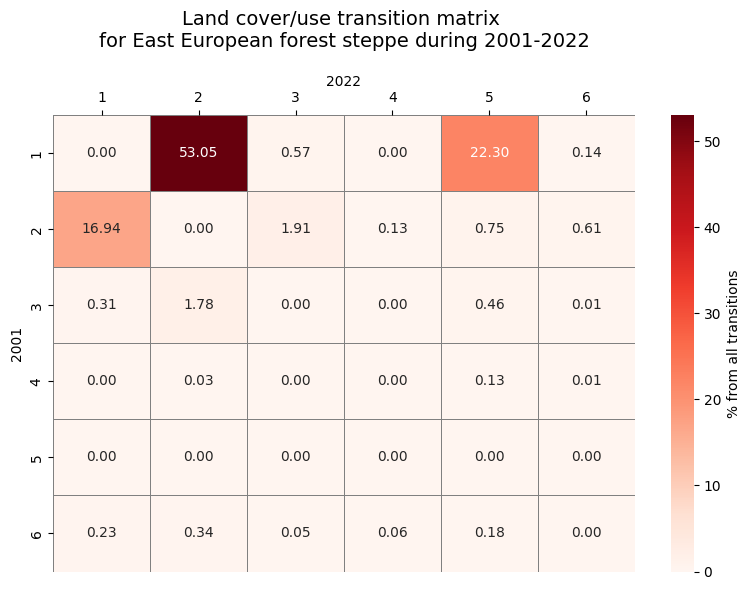

In [9]:
transition_matrix_changes = transition_matrix.copy()
for i in transition_matrix_changes.index:
    if i in transition_matrix_changes.columns:
        transition_matrix_changes.loc[i, i] = 0 

transitions_count = transition_matrix_changes.values.sum()
percent_matrix = (transition_matrix_changes / transitions_count * 100).round(2)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(percent_matrix,
                 annot=True, fmt=".2f", cmap="Reds",
                 linewidths=0.5, linecolor='gray',
                 cbar_kws={"label": "% from all transitions"})

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title("Land cover/use transition matrix \nfor East European forest steppe during 2001-2022", fontsize=14, pad=20)
plt.xlabel("2022")
plt.ylabel("2001")
#plt.title("Land cover/use transition matrix \nfor East European forest steppe during 2010-2019", fontsize=14, pad=20)
#plt.xlabel("2019 год")
#plt.ylabel("2010 год")

plt.tight_layout()
plt.show()